In [2]:
%load_ext autoreload
%autoreload 2
from WhiteDwarf import WhiteDwarf
from plotter import plotter
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/WhiteDwarf.py:103: RuntimeWarning: invalid value encountered in scalar divide
  nm_drhodr = nm_TOV / self.nm.gamma(nm_rho)


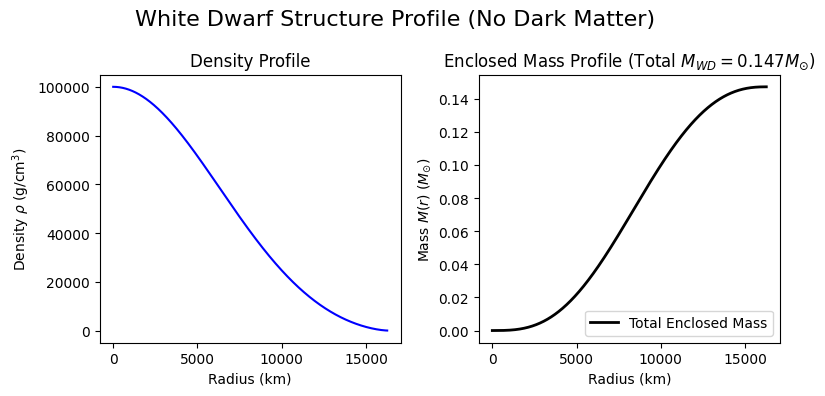

In [3]:
wd_nodm = WhiteDwarf(
                 nm_rhoc=1e5, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 )
wd_nodm.integrate()
wd_profiles = plotter(wd_nodm)
wd_profiles.plot_profiles()

In [4]:
from constant import C_e, mp, M_SOLAR
#L = self.k * self.dE * m / self.m # unit: erg/s
print(f"proton decay: {1e-33 * (1e9 * C_e) * 2.2 * M_SOLAR / mp} erg/s") # proton decay
print(f"neutron star: {(1/(15 * 60)) * (0.782e3 * C_e) * 2.2 * M_SOLAR / mp} erg/s") # neutron

proton decay: 4.172539721516983e+21 erg/s
neutron star: 3.6254734024736447e+45 erg/s


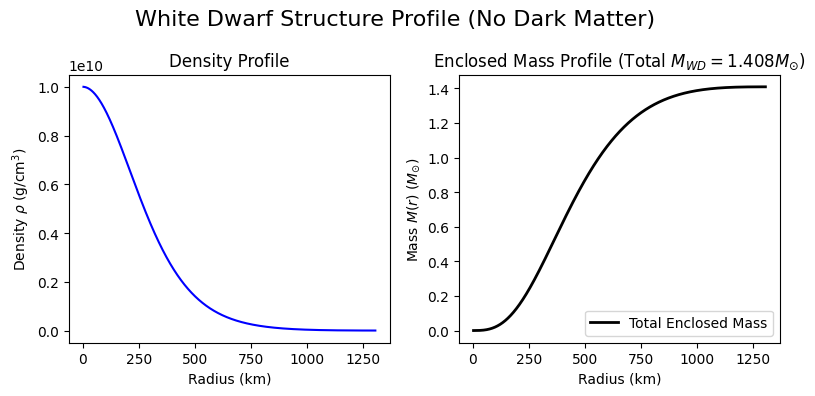

In [5]:
wd_nodm = WhiteDwarf(
                 nm_rhoc=1e10, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 )
wd_nodm.integrate()
wd_profiles = plotter(wd_nodm)
wd_profiles.plot_profiles()

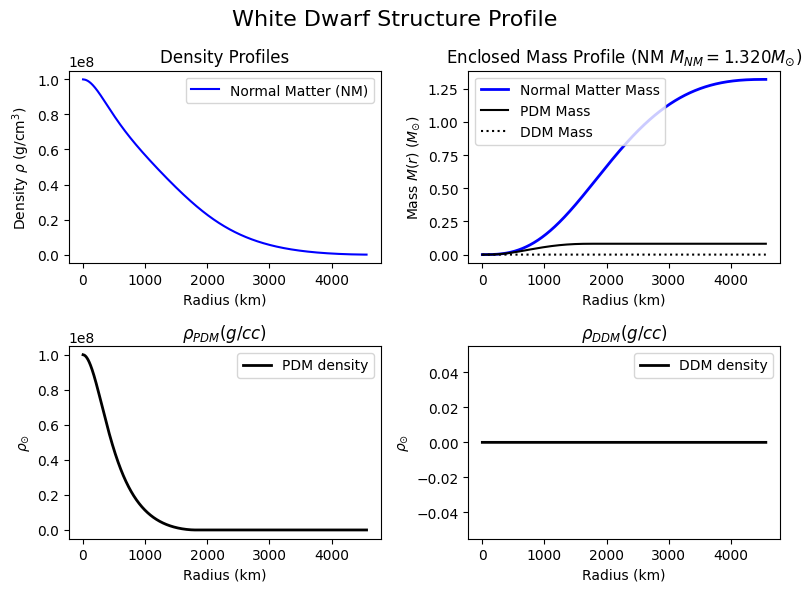

In [23]:
wd = WhiteDwarf(
                 nm_rhoc=1e8, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 pdm_rhoc=1e8, # core density of parent dark matter [g/cc]
                 ddm_rhoc=0, # core density of daughter dark matter [g/cc]
                 k=1e-33, # decay constant of parent dark matter [s-1]
                 Z=6, # atomic number of normal matter 
                 pdm_m=3, # mass of parent dark matter particle [GeV]
                 ddm_m=2 # mass of daughter dark matter particle [GeV]
                 )
wd.integrate(verbose=False)
wd_plt = plotter(wd)
wd_plt.plot_profiles()

In [18]:
wd.mbar2m(wd.history[:, 5][-1])

1.0656011794354765e-10

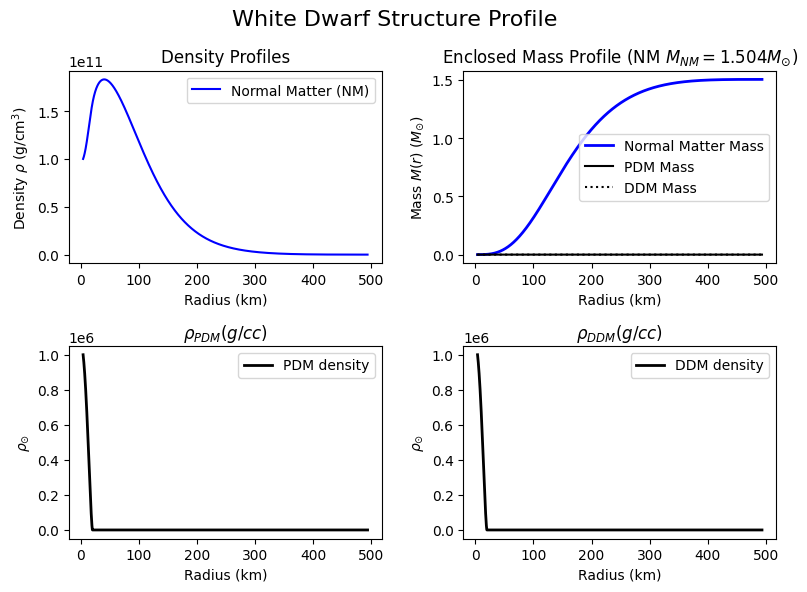

In [71]:
wd = WhiteDwarf(
                 nm_rhoc=1e11, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 pdm_rhoc=1e6, # core density of parent dark matter [g/cc]
                 ddm_rhoc=1e6, # core density of daughter dark matter [g/cc]
                 k=1e-7, # decay constant of parent dark matter [s-1]
                 Z=6, # atomic number of normal matter 
                 pdm_m=3, # mass of parent dark matter particle [GeV]
                 ddm_m=2.9 # mass of daughter dark matter particle [GeV]
                 )
wd.integrate(verbose=False)
wd_plt = plotter(wd)
wd_plt.plot_profiles()

In [24]:
from constant import c
wd_L = wd.pdm.luminosity(wd.history[:, 5][-1] * wd.M0)
solar_L = 3.8e33
wd_L#-2.5 * np.log10(wd_L / solar_L) + 4.4

4.866385926398469e+19

  0%|          | 0/10 [00:00<?, ?it/s]/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/WhiteDwarf.py:104: RuntimeWarning: invalid value encountered in scalar divide
  nm_drhodr = nm_TOV / self.nm.gamma(nm_rho)
100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


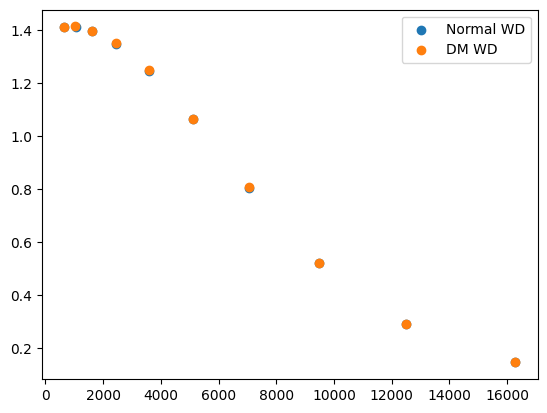

In [33]:
wd_nodm_M = []
wd_nodm_R = []
wd_dm_R = []
wd_dm_M = []

param = {"Ye":0.5, # electron fraction
        #"pdm_rhoc":1e5, # core density of parent dark matter [g/cc]
        #"ddm_rhoc":1e5, # core density of daughter dark matter [g/cc]
        "k":1e-7, # decay constant of parent dark matter [s-1]
        "Z":6, # atomic number of normal matter 
        "pdm_m":3, # mass of parent dark matter particle [GeV]
        "ddm_m":2.5 # mass of daughter dark matter particle [GeV]
        }

nm_density_range = np.logspace(5, 11, 10)
for nm_density in tqdm(nm_density_range):
    wd_dm = WhiteDwarf(nm_rhoc=nm_density, pdm_rhoc = nm_density/1e5, ddm_rhoc = nm_density/1e5, **param)
    wd_dm.integrate()
    wd_dm_M.append(wd_nodm.mbar2m(wd_dm.history[-1][4]))
    wd_dm_R.append(wd_nodm.rbar2r(wd_dm.history[-1][0]))
    
    wd_nodm = WhiteDwarf(
                 nm_rhoc=nm_density, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 )
    
    wd_nodm.integrate()
    wd_nodm_M.append(wd_nodm.mbar2m(wd_nodm.history[-1][2]))
    wd_nodm_R.append(wd_nodm.rbar2r(wd_nodm.history[-1][0]))

plt.scatter(wd_nodm_R, wd_nodm_M, label='Normal WD')
plt.scatter(wd_dm_R, wd_dm_M, label='DM WD')
plt.legend()

100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


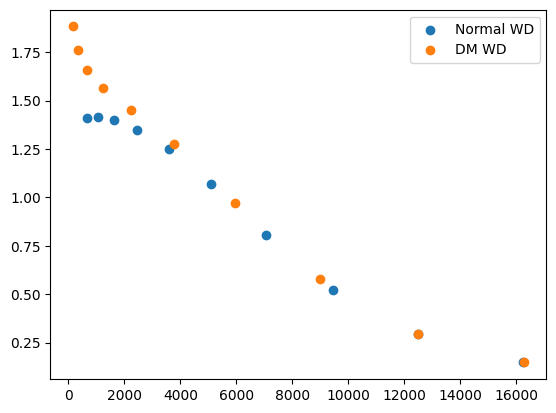

In [255]:
wd_nodm_M = []
wd_nodm_R = []
wd_dm_R = []
wd_dm_M = []

param = {"Ye":0.5, # electron fraction
        #"pdm_rhoc":1e5, # core density of parent dark matter [g/cc]
        #"ddm_rhoc":1e5, # core density of daughter dark matter [g/cc]
        "k":1e-7, # decay constant of parent dark matter [s-1]
        "Z":6, # atomic number of normal matter 
        "pdm_m":3, # mass of parent dark matter particle [GeV]
        "ddm_m":2.5 # mass of daughter dark matter particle [GeV]
        }

nm_density_range = np.logspace(5, 11, 10)
for nm_density in tqdm(nm_density_range):
    wd_dm = WhiteDwarf(nm_rhoc=nm_density, pdm_rhoc = nm_density/1e5, ddm_rhoc = nm_density/1e5, **param)
    wd_dm.integrate()
    wd_dm_M.append(wd_nodm.mbar2m(wd_dm.history[-1][4]))
    wd_dm_R.append(wd_nodm.rbar2r(wd_dm.history[-1][0]))
    
    wd_nodm = WhiteDwarf(
                 nm_rhoc=nm_density, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 )
    
    wd_nodm.integrate()
    wd_nodm_M.append(wd_nodm.mbar2m(wd_nodm.history[-1][2]))
    wd_nodm_R.append(wd_nodm.rbar2r(wd_nodm.history[-1][0]))

plt.scatter(wd_nodm_R, wd_nodm_M, label='Normal WD')
plt.scatter(wd_dm_R, wd_dm_M, label='DM WD')
plt.legend()

In [235]:
print(wd_dm.mbar2m(wd_dm.history[-1][-2] + wd_dm.history[-1][-1]))
print(wd_dm.mbar2m(wd_dm.history[-1][-3]))

4.328325280052365e-09
1.8265087161507991
